# **Brownian Motion and Geometric Brownian Motion Simulator**
## **Contents**
1. [Introduction](#Introduction)
2. [Brownian Motion Simulator](#Brownian-Motion-Simulator)
3. [Brownian Motion Parameter-Dependent Simulator](#Brownian-Motion-Parameter-Dependent-Simulator)
4. [Geometric Brownian Motion Simulator](#Geometric-Brownian-Motion-Simulator)
5. [Asset Price Simulator](#Asset-Price-Simulator)
6. [Credits](#Credits)


## **Introduction**
This project aims to simulate Brownian Motions, Geometric Brownian Motions and asset prices using Python. Some of the theoretical aspects are also presented throughout, although those are not required to be known at a high level in order to appreciate the code. The `numpy`, `matplotlib.pyplot` and `seaborn` libraries is imported under their usual aliases for use in this project. Moreover, a random seed value is set for reproducibility and the plot styles are adjusted for aesthetic reasons.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(30)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

## **Brownian Motion Simulator**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space and let $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ be a $\mathbb{R}$-valued stochastic process on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$. The stochastic process $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ is a *Brownian Motion* (or *Wiener process*) if and only if all of the following conditions are satisfied:
1. **Almost-sure initialisation:** $W_{0} =_{\mathbb{P}\text{-a. s.}} 0$
2. **Path-continuity:** $\forall \omega \in \Omega, \enspace W_{\cdot}(\omega) \in \mathscr{C}\left(\mathbb{R}_{+}, \mathbb{R}\right)$
3. **Increment normality:** $\forall (t,u) \in \mathbb{R}_{+} \times \mathbb{R}_{+}^{*}, \enspace W_{t + u} - W_{t} \hookrightarrow \mathsf{Normal}(0, u)$
4. **Increment independence:** $\forall (t,u) \in \mathbb{R}_{+} \times \mathbb{R}_{+}^{*}, \; \forall s \in [0,t[, \enspace W_{t + u} - W_{t} \perp_{\mathbb{P}} W_{s}$

It can be proven that such a stochastic process does indeed exist, although this is generally quite complicated. The existence of Brownian Motions are admitted without proof in this project. An immediate consequence of the above conditions is the following: if $(W_{t})_{t \in \mathbb{R}_{+}}$ is a Brownian Motion on a probability space $\left(\Omega,\mathscr{F},\mathbb{P}\right)$, then:
1. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{E}(W_{t}) = 0$
2. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{V}(W_{t}) = t$
3. $\forall t \in \mathbb{R}_{+}, \enspace \mathbf{\sigma}(W_{t}) = \sqrt{t}$
4. $\forall t \in \mathbb{R}_{+}^{*},  \enspace W_{t} \hookrightarrow \mathsf{Normal}(0, t)$
5. $\forall (t, x) \in \mathbb{R}_{+}^{*} \times \mathbb{R}, \enspace f_{W_{t}}(x) = \frac{1}{\sqrt{2 \pi t}}e^{-\frac{x^2}{2t}}$

where $\mathbb{E}$, $\mathbb{V}$ and $\mathbf{\sigma}$ are the expectation, variance and standard deviation operators and $f_{W_{\cdot}}$ is the probability density function of the random variable $W_{\cdot}$.

One can simulate Brownian Motions using the `brownian_motion` function defined in the cell below, depending on a specified time step, time horizon and number of Brownian Motions to simulate.

In [10]:
# Define the browniam_motion function
def brownian_motion(T, dt, N):
    """
    Returns a numpy array simulating one or more Brownian Motion(s)

    Parameters
    ----------
    T : int/float
        Terminal time
    dt : int/float
        Time increment
    N : int/float
        Number of Brownian Motion(s) to simulate up to terminal time T

    Returns
    -------
    numpy.ndarray
        A 2-dimensional numpy array containing all values of all simulated Brownian Motion(s)
    """
    return np.random.normal(loc = 0, scale = np.sqrt(dt), size = (T, N))

## **Brownian Motion Parameter-Dependent Simulator**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space and let $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ be a $\mathbb{R}$-valued stochastic process on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ and let $(\mu, \sigma)$ be an ordered pair of real numbers in $\mathbb{R}_{+} \times \mathbb{R}_{+}^{*}$. The stochastic process $\left(W_{t}\right)_{t \in \mathbb{R}_{+}}$ is a *Brownian Motion with drift parameter $\mu$ and scale parameter $\sigma$* if and only if all of the following conditions are satisfied:
1. **Almost-sure initialisation:** $W_{0} =_{\mathbb{P}\text{-a. s.}} 0$
2. **Path-continuity:** $\forall \omega \in \Omega, \enspace W_{\cdot}(\omega) \in \mathscr{C}\left(\mathbb{R}_{+}, \mathbb{R}\right)$
3. **Increment normality:** $\forall (t,u) \in \mathbb{R}_{+} \times \mathbb{R}_{+}^{*}, \enspace W_{t + u} - W_{t} \hookrightarrow \mathsf{Normal}(\mu u, \sigma^2 u)$
4. **Increment independence:** $\forall (t,u) \in \mathbb{R}_{+} \times \mathbb{R}_{+}^{*}, \; \forall s \in [0,t[, \enspace W_{t + u} - W_{t} \perp_{\mathbb{P}} W_{s}$

This is an immediate generalisation of the previous definition of a Brownian Motion, which itself instantiates a Brownian Motion with drift parameter $0$ and scale parameter $1$. An immediate consequence of the above conditions is the following: if $(W_{t})_{t \in \mathbb{R}_{+}}$ is a Brownian Motion with drift parameter $\mu$ and scale parameter $\sigma$ on a probability space $\left(\Omega,\mathscr{F},\mathbb{P}\right)$, then:
1. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{E}(W_{t}) = \mu t$
2. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{V}(W_{t}) = \sigma^2 t$
3. $\forall t \in \mathbb{R}_{+}, \enspace \mathbf{\sigma}(W_{t}) = \sigma\sqrt{t}$
4. $\forall t \in \mathbb{R}_{+}^{*},  \enspace W_{t} \hookrightarrow \mathsf{Normal}(\mu t, \sigma^2 t)$
5. $\forall (t, x) \in \mathbb{R}_{+}^{*} \times \mathbb{R}, \enspace f_{W_{t}}(x) = \frac{1}{\sqrt{2 \pi t}\sigma}e^{-\frac{1}{2}\left(\frac{x-\mu t}{\sigma\sqrt{t}}\right)^2}$
6. There exists a Brownian Motion $(Z_{t})_{t \in \mathbb{R}_{+}}$ with drift parameter $0$ and scale parameter $1$ on $\left(\Omega,\mathscr{F},\mathbb{P}\right)$ such that:
$$\forall t \in \mathbb{R}_{+}, \enspace W_{t} =_{\mathbb{P}\text{-a.s.}} \mu t + \sigma Z_{t}$$

where $\mathbb{E}$, $\mathbb{V}$ and $\mathbf{\sigma}$ are the expectation, variance and standard deviation operators and $f_{W_{\cdot}}$ is the probability density function of the random variable $W_{\cdot}$.

One can simulate parameter-dependent Brownian Motions using the `brownian_motion_parameter_dependent` function defined in the cell below, depending on a specified time step, time horizon and number of Brownian Motions to simulate.

In [4]:
# Define the brownian_motion_parameter_dependent function
def brownian_motion_parameter_dependent(mu, sigma, T, dt, N):
    """
    Returns a numpy array simulating one or more parameter-dependent Brownian Motion(s)

    Parameters
    ----------
    mu : int/float
        Drift parameter of the Brownian Motion(s)
    sigma : int/float
        Scale parameter of the Brownian Motion(s)
    T : int/float
        Terminal time
    dt : int/float
        Time increment
    N : int/float
        Number of Brownian Motion(s) to simulate up to terminal time T

    Returns
    -------
    numpy.ndarray
        A 2-dimensional numpy array containing all values of all simulated parameter-dependent Brownian Motion(s)
    """
    return mu * dt + sigma * brownian_motion(T, dt, N)


## **Geometric Brownian Motion Simulator**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space, let $(S_{t})_{t \in \mathbb{R}_{+}}$ be a $\mathbb{R}$-valued stochastic process on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ and let $(\mu, \sigma)$ be an ordered pair of real numbers in $\mathbb{R} \times \mathbb{R}_{+}^{*}$. The stochastic process $(S_{t})_{t \in \mathbb{R}_{+}}$ is a *Geometric Brownian Motion with percentage drift $\mu$ and percentage volatility $\sigma$* on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ if and only if there exists a Brownian Motion $(W_{t})_{t \in \mathbb{R}_{+}}$ on $(\Omega,\mathscr{F},\mathbb{P})$ such that:
$$\forall t \in \mathbb{R}_{+}, \enspace S_{t} =_{\mathbb{P}\text{-a.s.}} e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_{t}}$$
An immediate consequence of the above conditions is the following: if $(S_{t})_{t \in \mathbb{R}_{+}}$ is Geometric Brownian Motion with percentage drift $\mu$ and percentage volatility $\sigma$ on a probability space $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ and $(W_{t})_{t \in \mathbb{R}_{+}}$ is a Brownian Motion on probability space $\left(\Omega,\mathscr{F},\mathbb{P}\right)$ such that the above equation holds, then:
1. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{E}(S_{t}) = e^{\mu t}$
2. $\forall t \in \mathbb{R}_{+}, \enspace \mathbb{V}(S_{t}) = e^{2\mu t}\left(e^{\sigma^2 t} - 1\right)$
3. $\forall t \in \mathbb{R}_{+}, \enspace \mathbf{\sigma}(S_{t}) = e^{\mu t}\sqrt{e^{\sigma^2 t} - 1}$
4. $\forall t \in \mathbb{R}_{+}^{*},  \enspace S_{t} \hookrightarrow \mathsf{Log\text{-}Normal}\left(\left(\mu - \frac{\sigma^2}{2}\right)t, \sigma\sqrt{t}\right)$
5. $\forall (t, x) \in \left(\mathbb{R}_{+}^{*}\right)^2, \enspace f_{S_{t}}(x) = \frac{1}{\sqrt{2\pi t} \sigma x}e^{-\frac{1}{2}\left(\frac{\ln(x) - \left(\mu - \frac{\sigma^2}{2}\right)t}{\sigma\sqrt{t}}\right)^2}$

where $\mathbb{E}$, $\mathbb{V}$ and $\mathbf{\sigma}$ are the expectation, variance and standard deviation operators and $f_{S_{\cdot}}$ is the probability density function of the random variable $S_{\cdot}$. 

One can simulate Geometric Brownian Motions using the `geometric_brownian_motion` function defined in the cell below, depending on a specified time step, time horizon, percentage drift, percentage volatility and number of Geometric Brownian Motions to simulate.

In [5]:
# Define the geometric_brownian_motion function
def geometric_brownian_motion(mu, sigma, T, dt, N):
    """
    Returns a numpy array simulating one or more parameter-dependent Geometric Brownian Motion(s)

    Parameters
    ----------
    mu : int/float
        Percentage drift of the Geometric Brownian Motion(s)
    sigma : int/float
        Percentage volatility of the Brownian Motion(s)
    T : int/float
        Terminal time
    dt : int/float
        Time increment
    N : int/float
        Number of Geometric Brownian Motion(s) to simulate up to terminal time T

    Returns
    -------
    numpy.ndarray
        A 2-dimensional numpy array containing all values of all simulated parameter-dependent Geometric Brownian Motion(s)
    """
    return np.exp((mu - sigma ** 2 / 2) * dt + sigma * brownian_motion(T, dt, N))

## **Asset Price Simulator**

In general, asset prices are always positive and their returns tend to have a leptokurtic distribution (i.e., their probability distributions tend to have heavy tails). This is one of the reasons why they are sometimes represented as Geometric Brownian Motions, where the percentage drift is the expected return across a given time horizon, and the percentage volatility is the standard deviation of returns across time horizons. They can be simulated from a given initial price (sometimes denoted $S_{0}$) using the `asset_price` function defined in the cell below.

To visualise the result using Python, suppose that one is working with an asset whose price (in USD, say) varies as per a Geometric Brownian Motion $(S_{t})_{t \in \mathbb{R}_{+}}$ on some probability space $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ satisfying the following properties:
- At time $0$, the asset costs $\$100$, that is: $S_{0} =_{\mathbb{P}{\text{-a.s.}}} 100$.
- The asset has an expected return of $35\%$ over the time horizon under consideration: $\mu = 0.35$.
- The asset has a volatility of $25\%$ over the time horizon under consideration: $\sigma = 0.25$.
- The time horizon (in days) under consideration is five trading years: $T = 5 \times 252 = 1260$.
- The time step (in days) under consideration is one day: $\Delta t = \frac{1}{252}$.
- The number of simulations desired to run is $1000$: $N = 1000$.

then one can set $\left(S_{0}, \mu, \sigma, T, \Delta t, N\right) = \left(100, 0.25, 0.35, 1260, \frac{1}{252}, 1000\right)$ as the argument vector of the `asset_price` function to generate and plot the simulated price paths as in the cell below:

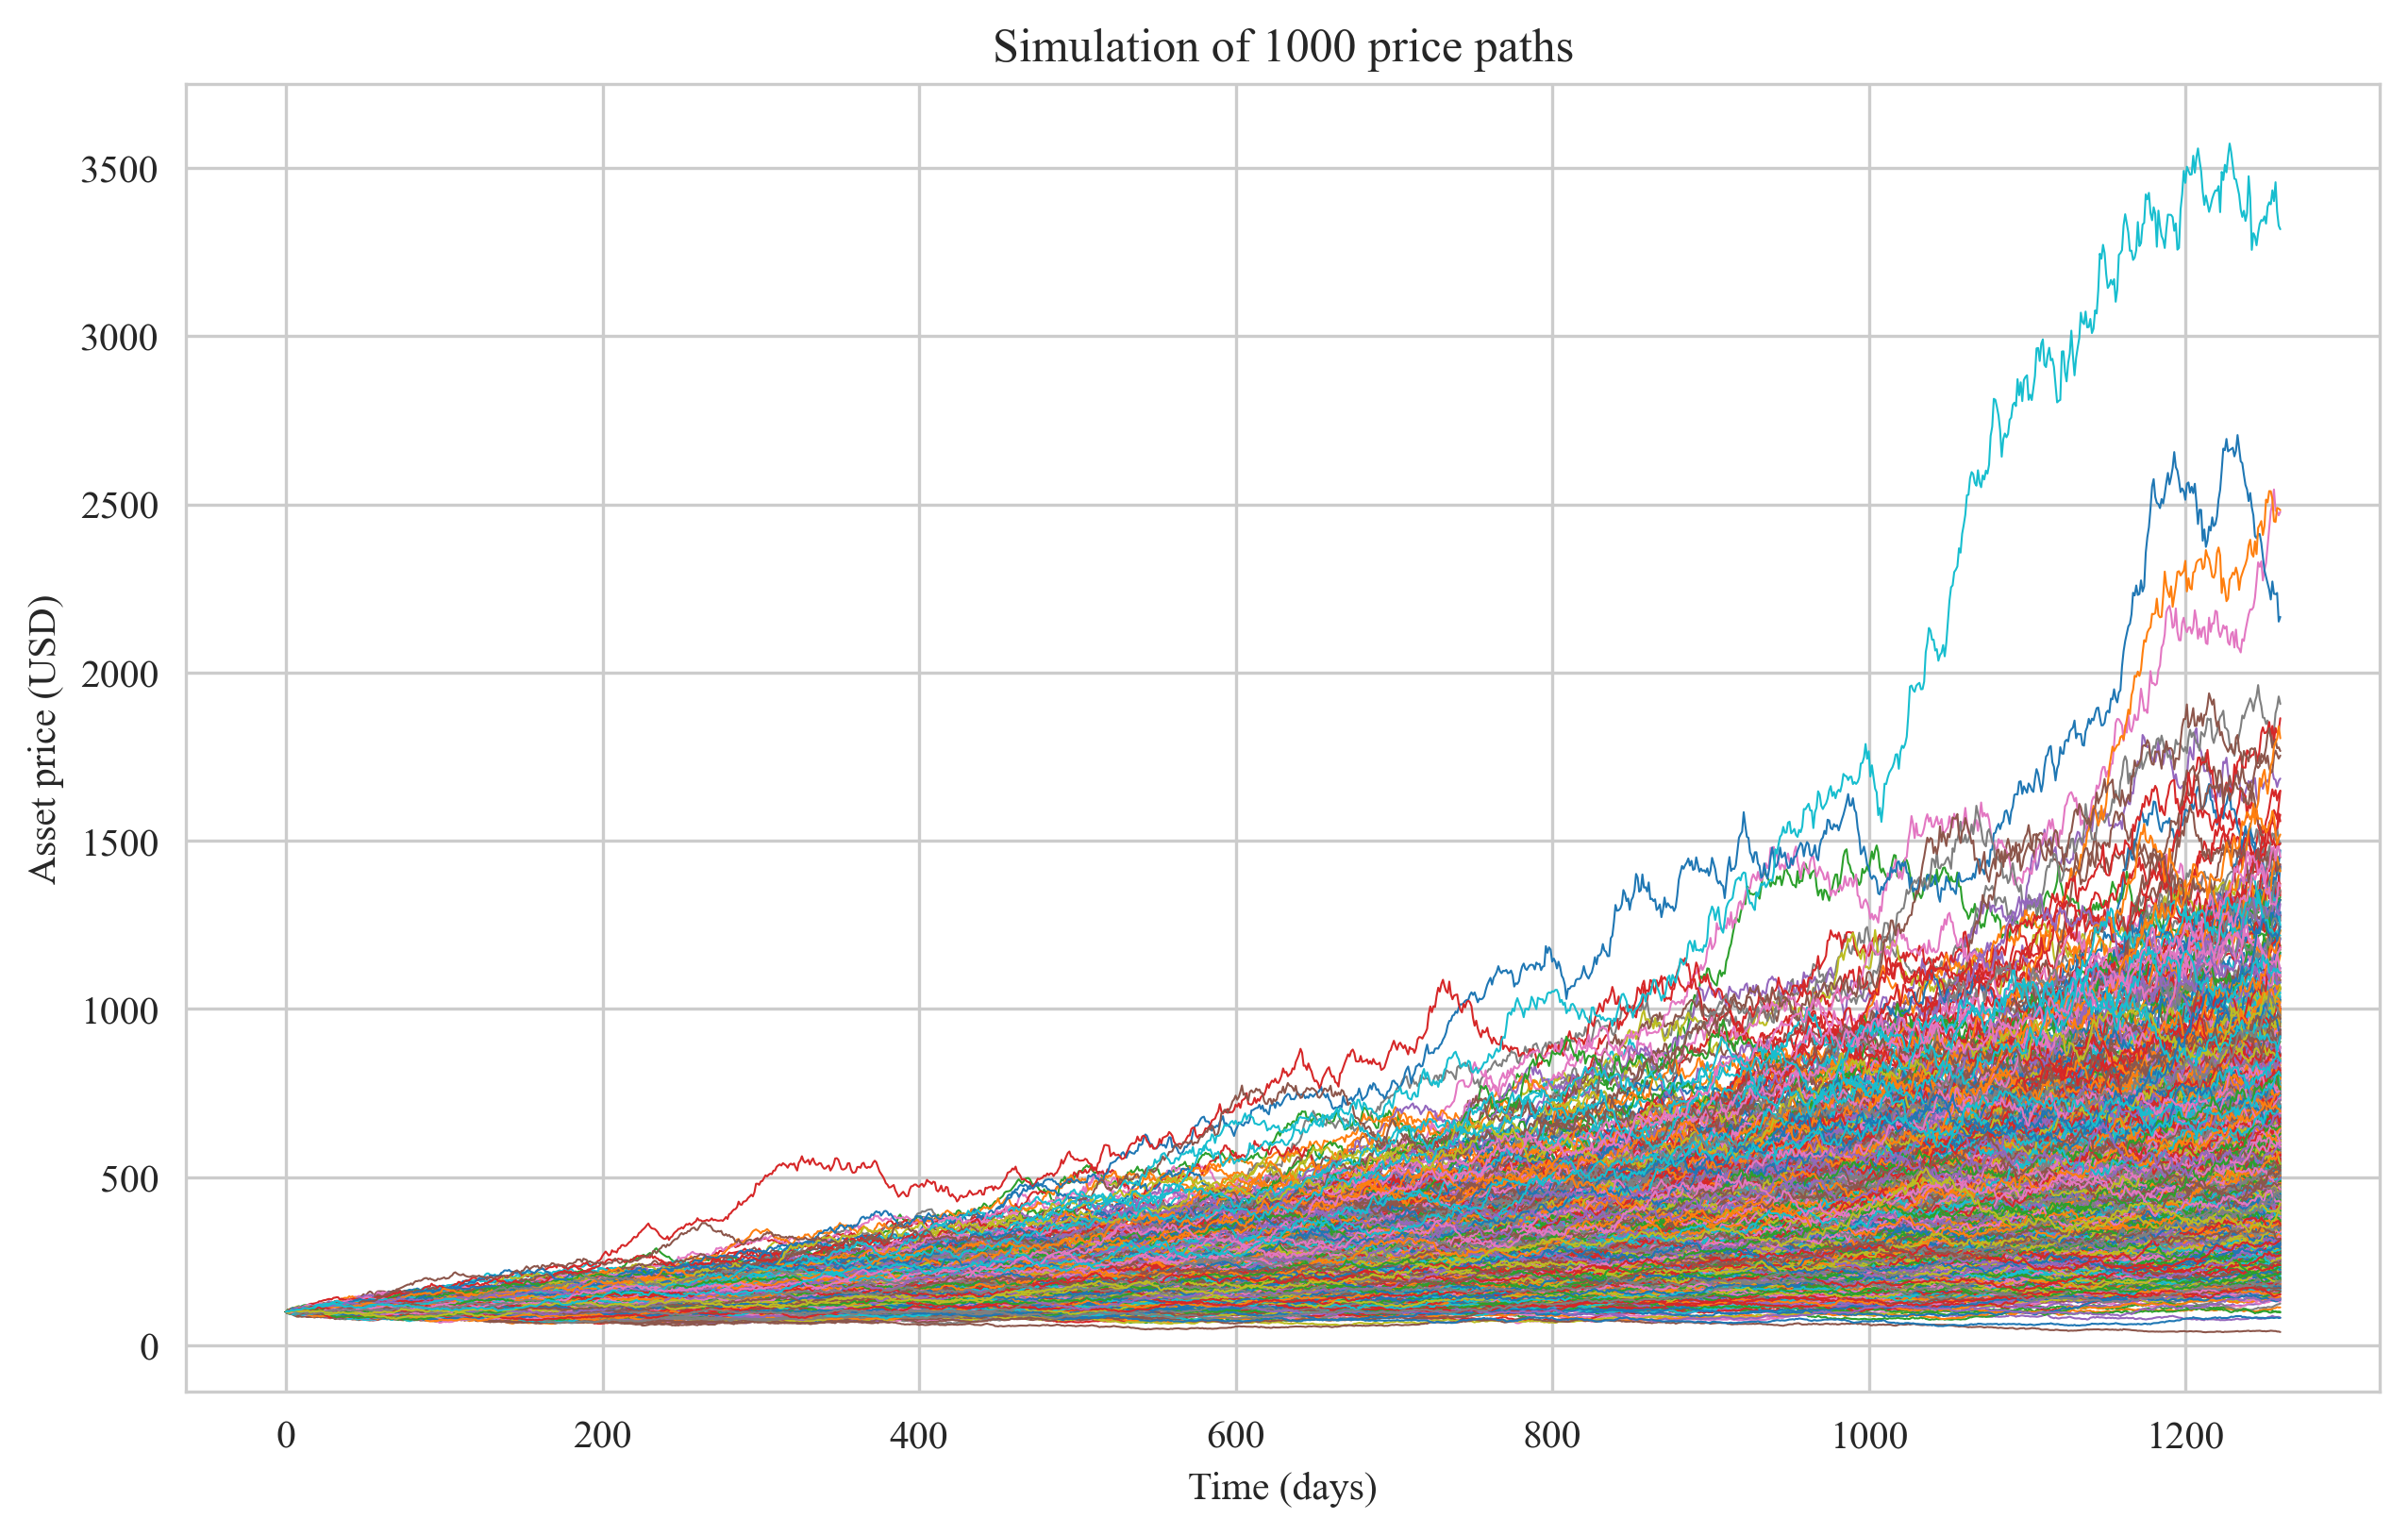

In [6]:
def asset_price(S0, mu, sigma, T, dt, N):
    """
    Returns a numpy array simulating one or more asset price(s)

    Parameters
    ----------
    S0 : int/float
        Initial price of the underlying asset.
    mu : int/float
        Percentage drift of the asset price(s)
    sigma : int/float
        Percentage volatility of the asset price(s)
    T : int/float
        Terminal time
    dt : int/float
        Time increment
    N : int/float
        Number of asset price(s) to simulate up to terminal time T

    Returns
    -------
    numpy.ndarray
        A 2-dimensional numpy array containing all values of all simulated asset price(s)
    """
    returns = geometric_brownian_motion(mu, sigma, T, dt, N)
    stacked = np.vstack([np.ones(N), returns])
    return S0 * stacked.cumprod(axis=0)

# Initialise the argument vector for the asset_price function
S0 = 100
mu = 0.35
sigma = 0.25
T = 1260
dt = 1 / 252
N = 1000

# Simulate an asset price and visualise this simulation
price_paths = asset_price(S0, mu, sigma, T, dt, N)
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
plt.plot(price_paths, linewidth=0.5)
ax.set(xlabel = "Time (days)", ylabel = "Asset price (USD)", title = f"Simulation of {N} price paths")
plt.show()

## **Credits**
- “[Brownian Motion with Drift and Scaling](https://stats.libretexts.org/@go/page/10404).” 2022. University of Alabama in Huntsville. April 24, 2022.
- “[Geometric Brownian Motion](https://stats.libretexts.org/@go/page/10406).” 2022. University of Alabama in Huntsville. April 24, 2022.
- Wikipedia contributors, "[Log-normal distribution](https://en.wikipedia.org/w/index.php?title=Log-normal_distribution&oldid=1199211330)," Wikipedia, The Free Encyclopedia, (accessed February 9, 2024).
- Wikipedia contributors, "[Brownian Motion](https://en.wikipedia.org/w/index.php?title=Wiener_process&oldid=1190944087)," Wikipedia, The Free Encyclopedia (accessed February 9, 2024).
- The original code is provided by Jason Strimpel, of [PyQuant News](https://pyquantnews.com/) via his email newsletter. However, it has been modified and expanded for the purposes of this project.